Name:Meghashyam Shenoy
Batch:B4
Section:IV Sem B section
Reg no:220968352

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("RF_Dataset1_heart_v2.csv")

Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [7]:
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [8]:
df.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [9]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [10]:
df.corr()

,age,sex,BP,cholestrol,heart disease
age,1.000000,-0.094401,0.273053,0.220056,0.212322
sex,-0.094401,1.000000,-0.062693,-0.201647,0.297721
BP,0.273053,-0.062693,1.000000,0.173019,0.155383
cholestrol,0.220056,-0.201647,0.173019,1.000000,0.118021
heart disease,0.212322,0.297721,0.155383,0.118021,1.000000


# Using decision tree

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



In [12]:
X=df.drop('heart disease',axis=1,inplace=False)
y=df['heart disease']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)



In [14]:
c=DecisionTreeClassifier()

In [15]:
c.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
y_pred=c.predict(X_test)

In [17]:
from sklearn.metrics import f1_score,accuracy_score

In [18]:
print(f1_score(y_test,y_pred))

0.5671641791044776


In [19]:
print(accuracy_score(y_test,y_pred))

0.6419753086419753


In [20]:
from sklearn import tree
with open("heart.txt","w") as f:
    f=tree.export_graphviz(c,out_file=f)


In [21]:
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix

In [22]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[33, 16],
       [13, 19]], dtype=int64)

<Axes: >

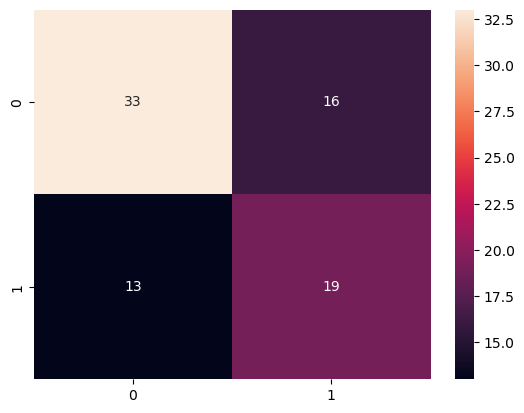

In [23]:
sns.heatmap(cm,annot=True)

In [24]:
from sklearn.metrics import roc_curve,auc 

In [31]:
y_p=c.predict_proba(X_test)[:,1]
y_p

array([1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.])

Text(0.5, 1.0, 'ROC curve')

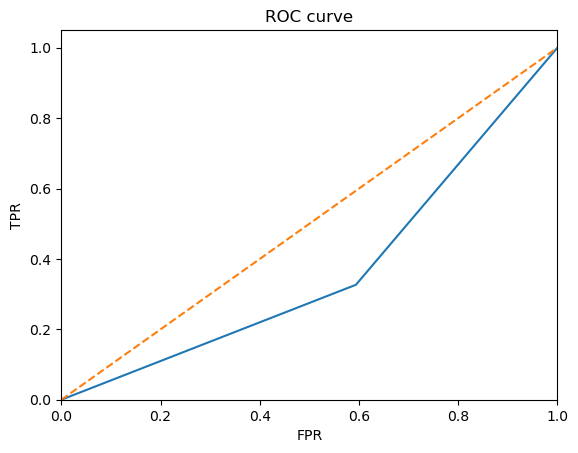

In [34]:
from sklearn.metrics import roc_curve,auc
tpr,fpr,_=roc_curve(y_test,y_p)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")

In [33]:
a=auc(fpr,tpr)
print(a)

0.36639030612244894


# Using Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6172839506172839


In [26]:
y_p=rf_classifier.predict_proba(X_test)[:,1]
y_p

array([0.54, 0.15, 0.53, 0.07, 0.3 , 0.58, 0.58, 0.84, 0.4 , 0.54, 0.1 ,
       0.63, 0.34, 0.52, 0.57, 0.57, 0.68, 0.35, 0.72, 0.28, 0.85, 0.2 ,
       0.45, 0.05, 0.53, 0.29, 0.22, 0.53, 0.13, 0.38, 0.56, 0.01, 0.61,
       0.14, 0.44, 0.55, 0.14, 0.53, 0.79, 0.77, 0.27, 0.34, 0.62, 0.65,
       0.17, 0.63, 0.89, 0.63, 0.4 , 0.15, 0.15, 0.23, 0.32, 0.32, 0.13,
       0.86, 0.21, 0.34, 0.12, 0.71, 0.52, 0.47, 0.87, 0.72, 0.27, 0.41,
       0.5 , 0.23, 0.72, 0.18, 0.78, 0.75, 0.35, 0.6 , 0.35, 0.69, 0.08,
       0.41, 0.81, 0.47, 0.14])

Text(0, 0.5, 'TPR')

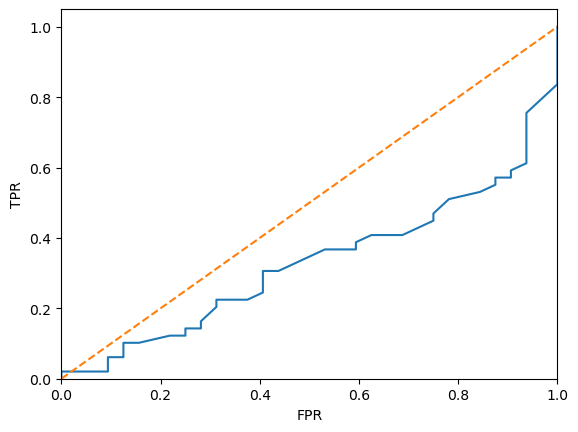

In [30]:
tpr,fpr,_=roc_curve(y_test,y_p)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlim(0,1)
plt.ylim(0,1.05)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")

In [28]:
print(auc(fpr,tpr))

0.3294005102040816
